In [96]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
# First experience with CAPTCHA...
#import requests
#first = requests.get('http://www.pdga.com/players?FirstName=&LastName=&PDGANum=&Status=All&Gender=All&Class=All&MemberType=All&City=&StateProv=All&Country=All&Country_1=All&UpdateDate=&order=Rating_1&sort=desc')
#second = requests.get('https://www.pdga.com/players?FirstName=&LastName=&PDGANum=&Status=All&Gender=All&Class=All&MemberType=All&City=&StateProv=All&Country=All&Country_1=All&UpdateDate=&order=Rating_1&sort=desc&page=1')
#urls = []
#for x in range(1,150):
#    urls.append('http://www.pdga.com/players?FirstName=&LastName=&PDGANum=&Status=All&Gender=All&Class=All&MemberType=All&City=&StateProv=All&Country=All&Country_1=All&UpdateDate=&order=Rating_1&sort=desc&page={}'.format(x))
#df_lst = []
#df_lst.append(pd.read_html(first.text)[0])
#for url in urls:
#    x = requests.get(url)
#    df = pd.read_html(x.text)[0]
#    df_lst.append(df)
#pdga_df = pd.concat(df_lst).reset_index()  
#pdga_df.to_excel('disc_golfers.xlsx')
dg_df = pd.read_excel('disc_golfers.xlsx')
dg_df['State/Prov'] = dg_df['State/Prov'].fillna('INT')
top_earners = pd.read_excel('top_earners.xlsx').drop(columns=['Unnamed: 0']).drop(columns=['index']).drop(columns=['Class']).drop(columns=['Year'])

In [97]:
#Creating a Region column
region_dict = {
    'West' : ['WA', 'OR', 'ID', 'MT', 'CA', 'NV', 'UT', 'CO', 'AK', 'HI'],
    'Southwest' : ['AZ', 'NM', 'TX', 'OK'],
    'Midwest' : ['ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'MN', 'WI', 'MI', 'IL', 'IN', 'OH', 'WY'],
    'Southeast' : ['AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'WV', 'VA', 'NC', 'SC', 'GA', 'FL'],
    'Northeast' : ['PA', 'NY', 'VT', 'NH', 'ME', 'MA', 'RI', 'CT', 'NJ', 'DE', 'MD', 'DC']
}
state_region = {'INT' : 'International'}
for key in region_dict:
    for state in region_dict[key]:
        state_region[state] = key
states = [key for key in state_region]
dg_states = dg_df['State/Prov'].unique()
extra = []
inter = []
for item in dg_states:
    if item not in states:
        extra.append(item)
        inter.append('International')
extra_dict = dict(zip(extra,inter))
state_region.update(extra_dict)
dg_df['Region'] = [state_region[row] for row in dg_df['State/Prov']]

In [98]:
def get_status(status):
    return status.split(' ')[0]
dg_df['Status'] = dg_df['Membership Status'].apply(lambda x: f"{get_status(x)}")
current = dg_df.loc[dg_df['Status'] == 'Current']
current = current.drop(columns=['Membership Status'])

In [99]:
#import requests
#first = requests.get('https://www.pdga.com/players/stats?page=0&Year=2021&player_Class=1&Gender=All&Bracket=All&continent=All&Country=All&StateProv=All&order=Prize&sort=desc')
#urls = []
#for x in range(1,200):
#    urls.append('https://www.pdga.com/players/stats?Year=2021&player_Class=1&Gender=All&Bracket=All&continent=All&Country=All&StateProv=All&order=Prize&sort=desc&page={}'.format(x))
#df_lst1 = []
#df_lst1.append(pd.read_html(first.text)[0])
#for url in urls:
#    x = requests.get(url)
#    df = pd.read_html(x.text)[0]
#    df_lst1.append(df)
#top_earners = pd.concat(df_lst1).reset_index()  
#top_earners.to_excel('top_earners.xlsx')
top_earners['Cash'] = top_earners['Cash'].str.replace(',', '').str.replace('$', '').astype(float)
top_earners['State/Province'] = top_earners['State/Province'].fillna('International')
top_earners['PPE'] = (top_earners['Points'] / top_earners['Events']).round(2)
top_earners['CPE'] = (top_earners['Cash'] / top_earners['Events']).round(2)
print(top_earners.dtypes)

Name               object
PDGA #              int64
Rating              int64
Gender             object
Division           object
Country            object
State/Province     object
Events              int64
Points              int64
Cash              float64
PPE               float64
CPE               float64
dtype: object


<ipython-input-99-ca73282dab5c>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  top_earners['Cash'] = top_earners['Cash'].str.replace(',', '').str.replace('$', '').astype(float)


In [100]:

states_df = pd.read_csv('state_regions.txt')
countries = pd.read_csv('countries.txt')
countries.loc[countries['name'] == 'Czechia', 'name'] = 'Czech Republic'
countries.loc[countries['name'] == 'United Kingdom of Great Britain and Northern Ireland', 'name'] = 'United Kingdom'
countries.loc[countries['name'] == 'Russian Federation', 'name'] = 'Russia'
country_region_dict = dict(zip(countries['name'],countries['region']))
us_states = states_df['State'].tolist()
state_lst = top_earners['State/Province'].unique()
state_region_dict = dict(zip(states_df['State'],states_df['Region']))
outside_us = []
for item in state_lst:
    if item not in us_states:
        outside_us.append(item)

outside_us_dict = {
    'International' : 'International', 
    'Ontario' : 'Canada', 
    'British Columbia' : 'Canada', 
    'Alberta' : 'Canada', 
    'Prince Edward Island' : 'Canada', 
    'Quebec' : 'Canada', 
    'Manitoba' : 'Canada', 
    'Nova Scotia' : 'Canada', 
    'New Brunswick' : 'Canada', 
    'Saskatchewan' : 'Canada', 
    'Victoria' : 'Australia', 
    'Lääne-Virumaa' : 'Finland', 
    'New South Wales' : 'Australia'
}
state_region_dict.update(outside_us_dict)
top_earners['Region'] = [state_region_dict[item] for item in top_earners['State/Province']]
not_us = []
for item in top_earners['Country']:
    if item != 'United States' and item not in not_us:
        not_us.append(item)
for item in not_us:
    top_earners.loc[top_earners['Country'] == item, "Region"] = country_region_dict[item]
#print(top_earners.isna().sum())
top_earners

,Name,PDGA #,Rating,Gender,Division,Country,State/Province,Events,Points,Cash,PPE,CPE,Region
0,P. McBeth,27523,1051,Male,Open,United States,California,23,28010,78903.0,1217.83,3430.57,West
1,R. Wysocki,38008,1053,Male,Open,United States,South Carolina,23,27650,74429.0,1202.17,3236.04,South
2,P. Pierce,29190,988,Female,Open Women,United States,Texas,23,4629,60249.0,201.26,2619.52,South
3,E. McMahon,37817,1053,Male,Open,United States,Colorado,18,21947,58065.0,1219.28,3225.83,West
4,C. Heimburg,45971,1049,Male,Open,United States,Florida,23,25840,54785.0,1123.48,2381.96,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,C. Kurka,112440,960,Male,Open,United States,Delaware,9,445,288.0,49.44,32.00,South
3996,O. Breistein,59468,949,Male,Open,Norway,International,10,1702,288.0,170.20,28.80,Europe
3997,D. Merritt,45960,843,Female,Pro Masters Women 40+,United States,Nevada,2,15,288.0,7.50,144.00,West
3998,K. Tush,90753,934,Male,Pro Masters 40+,United States,North Carolina,7,254,288.0,36.29,41.14,South


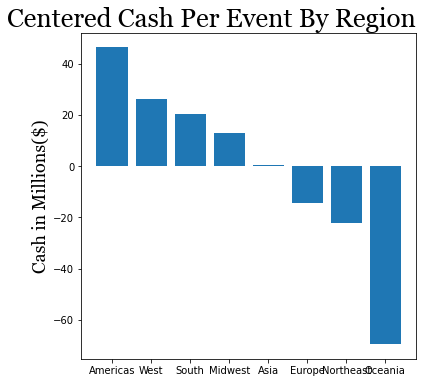

In [115]:
import matplotlib.pyplot as plt
region_totals = top_earners.groupby(['Region']).mean().drop(columns=['PDGA #']).reset_index()
region_totals['centered_cpe'] = region_totals['CPE'] - np.mean(region_totals['CPE'])
region_totals = region_totals.sort_values(by=['CPE'],ascending=False)

title_font = {'family':'georgia', 'size':26}
label_font = {'family':'georgia', 'size':18}
tick_font = {'family':'georgia', 'size':14}

plt.figure(figsize=(6,6))
plt.bar(region_totals['Region'],region_totals['centered_cpe'])
plt.title('Centered Cash Per Event By Region', fontdict=title_font, loc='right')
plt.ylabel('Cash in Millions($)',fontdict=label_font)
plt.show()

In [116]:
states = top_earners['State/Province'].unique()
state_count_dict = {}
for state in states:
    state_count_dict.update({state : 0})
for state in top_earners['State/Province']:
    state_count_dict[state] += 1
print(top_earners[top_earners['Region'] == 'Americas'])

               Name  PDGA #  Rating  Gender         Division Country  \
51       T. Gilbert   85850    1023    Male             Open  Canada   
165    C. Hanemayer   67314    1012    Male             Open  Canada   
201       M. Hendel   39469    1028    Male             Open  Canada   
356      C. Ozolins   55049    1013    Male             Open  Canada   
495       C. Zanini   81717    1003    Male             Open  Canada   
...             ...     ...     ...     ...              ...     ...   
3770      S. Beuker   66278     982    Male             Open  Canada   
3780       S. Pentz   81408     907    Male  Pro Masters 40+  Canada   
3848  D. Hochhalter  148940     943    Male             Open  Canada   
3850     J. MacLeod   66462     922    Male  Pro Masters 50+  Canada   
3887     K. O'Neill  100280     835  Female       Open Women  Canada   

        State/Province  Events  Points      Cash     PPE     CPE    Region  
51             Ontario      27   23450  13990.00  868.52  

In [9]:
#Webscrape the first page from an online disc golf course directory
#Note: Several of the desired columns contain images instead of text

#from bs4 import BeautifulSoup
#import requests
#html = requests.get('https://www.dgcoursereview.com/browse.php?cname=&designer=&holes=0&length_min=&length_max=&holetype=0&coursetype=a%3A2%3A%7Bi%3A0%3Bs%3A1%3A%221%22%3Bi%3A1%3Bs%3A1%3A%222%22%3B%7D&terrain=a%3A3%3A%7Bi%3A0%3Bi%3A1%3Bi%3A1%3Bi%3A2%3Bi%3A2%3Bi%3A3%3B%7D&landscape=a%3A3%3A%7Bi%3A0%3Bi%3A1%3Bi%3A1%3Bi%3A2%3Bi%3A2%3Bi%3A3%3B%7D&teetype=0&mtees=&mpins=&cf=&num_reviews=&rating_min=&rating_max=&yem=&yex=&country=1&state=&city=&photos=&videos=&tourneys=&camping=&restrooms=&nopets=&private=1&paytoplay=1&on_bg=&extinct=&page=1&zipcode=&zip_distance=&sort=rating&order=DESC').text
#soup = BeautifulSoup(html,"lxml")
#names = []
#locations = []
#num_holes = []
#basket_type = []
#tee_type = []
#landscape = []
#terrain = []

# append names
#for k in range(2,22):
#    trs = soup.find_all('tr')[k]
#    tds = trs.find_all('a')
#    for i in range(len(tds)):
#        names.append(tds[i].get_text().strip())

# append locations
#for k in range(2,22):
#    trs = soup.find_all('tr')[k]
#    tds = trs.find_all('td')
#    for i in range(1,len(tds),10):
#        locations.append(tds[i].get_text().strip())
        
# append number of holes
#for k in range(2,22):
#    trs = soup.find_all('tr')[k]
#    tds = trs.find_all('td')
#    for i in range(2,len(tds),10):
#       num_holes.append(tds[i].get_text().strip())
        
# append basket types
#for k in range(2,22):
#    trs = soup.find_all('tr')[k]
#    tds = trs.find_all('td')
#    for i in range(3,len(tds),10):
#        basket_type.append(tds[i].get_text().strip())
        
# append tee types
#for k in range(2,22):
#    trs = soup.find_all('tr')[k]
#    tds = trs.find_all('td')
#    for i in range(4,len(tds),10):
#        tee_type.append(tds[i].get_text().strip())


# create list of img tag attribute dictionaries from td tags
#tds = soup.find_all('td')
#img = []
#for i in range(len(tds)):
#    if tds[i].find('img') != None:
#        img.append(tds[i].find('img').attrs)
#    else:
#        img.append(None)


# create list of dictionaries with indices corresponding to landscape
# append the value of 'title' key of each dictionary to landscape list
#landscape_dicts = []
#for i in range(19, 214, 10):
#    landscape_dicts.append(img[i])
#for i in landscape_dicts:
#    landscape.append(i['title'])


# create list of dictionaries with indices corresponding to terrain
# append the value of 'title' key of each dictionary to terrain list
#terrain_dicts = []
#for i in range(20, 214, 10):
#    terrain_dicts.append(img[i])
#terrain_dicts[3] = {'title' : 'NaN'}
#for i in terrain_dicts:
#    terrain.append(i['title'])
  
    
# create list if div attribute dictionaries from td tags
# create list of unsplit review strings
#div = []
#for i in range(len(tds)):
#    if tds[i].find('div') != None:
#        div.append(tds[i].find('div').attrs)
#    else:
#        div.append(None)
#review_dicts = []
#for i in range(23,214,10):
#    review_dicts.append(div[i])
#reviews_unsplit = []
#for i in review_dicts:
#    reviews_unsplit.append(i['title'])


# create functions for splitting number of reviews and average review
# call functions inside list comprehensions for number of reviews and average review
#def get_num_reviews(str):
#    txt = str.split('-')[0]
#    return txt.split(' ')[1]
#def get_avg_review(str):
#    txt = str.split('-')[1]
#    return txt.split(' ')[2]
#num_reviews = [get_num_reviews(i) for i in reviews_unsplit]
#avg_review = [get_avg_review(i) for i in reviews_unsplit]


# create courses df and add all columns
#courses = pd.DataFrame()
#courses['name'] = names
#courses['location'] = locations
#courses['num_holes'] = num_holes
#courses['basket_type'] = basket_type
#courses['tee_type'] = tee_type
#courses['landscape'] = landscape
#courses['terrain'] = terrain
#courses['num_reviews'] = num_reviews
#courses['avg_review'] = avg_review
#courses


In [10]:
#Build a function that takes a url as the only argument and returns a pandas DataFrame

url_lst = ['https://www.dgcoursereview.com/browse.php?cname=&designer=&holes=0&length_min=&length_max=&holetype=0&coursetype=a%3A2%3A%7Bi%3A0%3Bs%3A1%3A%221%22%3Bi%3A1%3Bs%3A1%3A%222%22%3B%7D&terrain=a%3A3%3A%7Bi%3A0%3Bi%3A1%3Bi%3A1%3Bi%3A2%3Bi%3A2%3Bi%3A3%3B%7D&landscape=a%3A3%3A%7Bi%3A0%3Bi%3A1%3Bi%3A1%3Bi%3A2%3Bi%3A2%3Bi%3A3%3B%7D&teetype=0&mtees=&mpins=&cf=&num_reviews=&rating_min=&rating_max=&yem=&yex=&country=1&state=&city=&photos=&videos=&tourneys=&camping=&restrooms=&nopets=&private=1&paytoplay=1&on_bg=&extinct=&zipcode=&zip_distance=&sort=rating&order=DESC&page={}'.format(i) for i in range(2,392)]

def get_course_df(url):
    
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    
    def get_name(x):
        name = []
        for k in range(2,22):
            trs = x.find_all('tr')[k]
            tds = trs.find_all('a')
            for i in range(len(tds)):
                name.append(tds[i].get_text().strip())
        return name
    
    def get_location(x):
        location = []
        for k in range(2,22):
            trs = x.find_all('tr')[k]
            tds = trs.find_all('td')
            for i in range(1,len(tds),10):
                location.append(tds[i].get_text().strip())
        return location

    def get_num_holes(x):
        num_holes = []
        for k in range(2,22):
            trs = x.find_all('tr')[k]
            tds = trs.find_all('td')
            for i in range(2,len(tds),10):
                num_holes.append(tds[i].get_text().strip())
        return num_holes

    def get_basket_type(x):
        basket_type = []
        for k in range(2,22):
            trs = x.find_all('tr')[k]
            tds = trs.find_all('td')
            for i in range(3,len(tds),10):
                basket_type.append(tds[i].get_text().strip())
        return basket_type 
    
    def get_tee_type(x):
        tee_type = []
        for k in range(2,22):
            trs = soup.find_all('tr')[k]
            tds = trs.find_all('td')
            for i in range(4,len(tds),10):
                tee_type.append(tds[i].get_text().strip())
        return tee_type

    def get_landscape(x):
        tds = x.find_all('td')
        img_dicts = [tds[i].find('img').attrs if tds[i].find('img') is not None else {'title' : 'No Info'} for i in range(19, len(tds), 10)]
        landscape = [i['title'] for i in img_dicts]
        return landscape

    def get_terrain(x):
        tds = x.find_all('td')
        img_dicts = [tds[i].find('img').attrs if tds[i].find('img') is not None else {'title' : 'No Info'} for i in range(20, len(tds), 10)]
        terrain = [i['title'] for i in img_dicts]
        return terrain  
    
    def get_num_reviews(x):
        def split_num_reviews(str):
            txt = str.split('-')[0]
            return txt.split(' ')[1]       
        tds = x.find_all('td')
        div_dicts = [tds[i].find('div').attrs if tds[i].find('div') is not None else {'title' : 'No Info'} for i in range(23, len(tds), 10)]
        num_reviews_unsplit = [i['title'] for i in div_dicts]
        num_reviews = [split_num_reviews(i) for i in num_reviews_unsplit]
        return num_reviews

    def get_avg_review(x):
        def split_avg_review(str):
            txt = str.split('-')[1]
            return txt.split(' ')[2]
        tds = x.find_all('td')
        div_dicts = [tds[i].find('div').attrs if tds[i].find('div') is not None else {'title' : 'No Info'} for i in range(23, len(tds), 10)]
        avg_reviews_unsplit = [i['title'] for i in div_dicts]
        avg_review = [split_avg_review(i) for i in avg_reviews_unsplit]
        return avg_review
    
    course = pd.DataFrame()
    course['name'] = get_name(soup)
    course['location'] = get_location(soup)
    course['num_holes'] = get_num_holes(soup)
    course['basket_type'] = get_basket_type(soup)
    course['tee_type'] = get_tee_type(soup)
    course['landscape'] = get_landscape(soup)
    course['terrain'] = get_terrain(soup)
    course['num_reviews'] = get_num_reviews(soup)
    course['avg_review'] = get_avg_review(soup)
    return course

In [92]:
#run the function over 50 webpages at a time and append them to the main DataFrame
#for url in url_lst[201:251]:
    #courses = courses.append(get_course_df(url))
courses = pd.read_excel('dg_courses.xlsx')

#Create some variables for future use:

mean_avg_review = np.mean(courses['avg_review'])


In [78]:

courses['num_reviews'] = courses['num_reviews'].astype('int')
courses['avg_review'] = courses['avg_review'].astype('float')

#setting landscape and terrain as categorical variables
landscape_order = ['Mostly Flat', 'Moderately Hilly', 'Very Hilly']
courses['landscape'] = pd.Categorical(courses['landscape'], landscape_order, ordered=True)
courses['terrain'] = courses['terrain'].str.replace('No Info', 'Moderately Wooded').fillna('Moderately Wooded')
terrain_order = ['Lightly Wooded', 'Moderately Wooded', 'Heavily Wooded']
courses['terrain'] = pd.Categorical(courses['terrain'], terrain_order, ordered=True)
median_terrain = np.median(courses.terrain.cat.codes)
#print(terrain_order[int(median_terrain)])
#print(courses.terrain.unique())
#print(courses.terrain.value_counts(dropna=False))

#creating a column for the review count range and setting it as categorical
range_lst = courses.num_reviews.to_list()
num_range = []
for num in range_lst:
    if num <= 5:
        num_range.append('0 - 5')
    elif 5 < num <= 25:
        num_range.append('6 - 25')
    elif 25 < num <= 45:
        num_range.append('26 - 45')
    elif 45 < num <= 65:
        num_range.append('46 - 65')
    elif 65 < num <= 85:
        num_range.append('66 - 85')
    else:
        num_range.append('over 85')
courses['num_range'] = num_range
num_range_order = ['0 - 5', '6 - 25', '26 - 45', '46 - 65', '66 - 85', 'over 85']
courses['num_range'] = pd.Categorical(courses['num_range'], num_range_order, ordered=True)
courses

,Unnamed: 0,name,location,num_holes,basket_type,tee_type,landscape,terrain,num_reviews,avg_review,num_range
0,0,Eagles Crossing,"Hawk Point, MO",18,Gateway Titan,Concrete,Moderately Hilly,Moderately Wooded,2,5.0,0 - 5
1,1,Circle's Edge DGC,"Terrell, TX",18,DISCatcher,Concrete,Moderately Hilly,Heavily Wooded,2,5.0,0 - 5
2,2,Fort Clark DGC,"Brackettville, TX",9,Mach 2,Grass,Mostly Flat,Lightly Wooded,1,5.0,0 - 5
3,3,Jones Park - Gold,"Emporia, KS",18,Dynamic Veteran,Concrete,Moderately Hilly,Moderately Wooded,1,5.0,0 - 5
4,4,Wilderness Ranch,"Lakeside, AZ",18,Prodigy,Turf,Mostly Flat,Heavily Wooded,2,5.0,0 - 5
...,...,...,...,...,...,...,...,...,...,...,...
4575,15,Nibley City DGC,"Nibley, UT",9,DISCatcher,Concrete,Mostly Flat,Lightly Wooded,4,2.5,0 - 5
4576,16,Camp Sloper,"Southington, CT",18,Object,Grass,Mostly Flat,Lightly Wooded,2,2.5,0 - 5
4577,17,Lewis Lake DGC,"Tampa, FL",12,DISCatcher,Concrete,Mostly Flat,Moderately Wooded,3,2.5,0 - 5
4578,18,Cascade Sports Park,"Cascade, ID",20,Mach 2,Gravel,Mostly Flat,Moderately Wooded,1,2.5,0 - 5


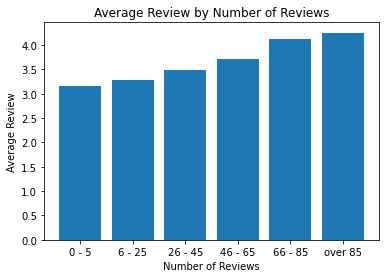

The more reviews a course has the better those reviews tend to be.
It makes sense that the best courses would be played and reviewed more often


In [77]:
#Does the number of reviews a course has affect it's average?

by_range = courses.groupby(['num_range']).mean().reset_index()
plt.figure(figsize=(6,4))
plt.bar(by_range['num_range'], by_range['avg_review'])
plt.title('Average Review by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Review')
plt.show()
print('The more reviews a course has the better those reviews tend to be.\nIt makes sense that the best courses would be played and reviewed more often')


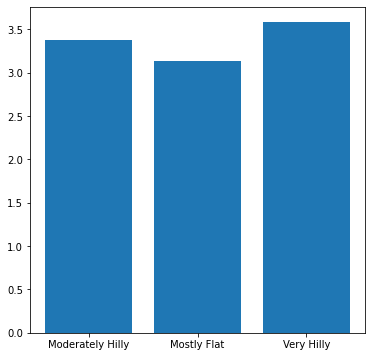

Disc golfers love a challenge.


In [94]:
#Which type of landscape and terrain correspond to higher average course reviews?

by_landscape = courses.groupby(['landscape']).mean().reset_index()
plt.figure(figsize=(6,6))
plt.bar(by_landscape['landscape'],by_landscape['avg_review'])
plt.show()
by_terrain = courses.groupby(['terrain']).mean().reset_index()

num_reviews_to_avg_review_correlation = courses.num_reviews.corr(courses.avg_review)
num_reviews_to_avg_review_correlation
print('Disc golfers love a challenge.')

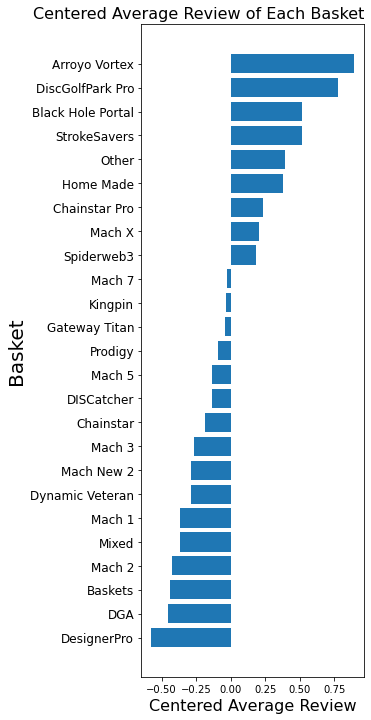

In [65]:
#Which type of basket is most likely to be found on a top rated course?
by_basket_type = courses[courses['num_reviews'] >= 25].groupby(['basket_type']).mean().reset_index().sort_values(by=['avg_review'],ascending=False)
reviews_by_basket = pd.DataFrame()
reviews_by_basket['Name'] = by_basket_type['basket_type']
reviews_by_basket['Average Review'] = by_basket_type['avg_review']
reviews_by_basket['Centered Average'] = reviews_by_basket['Average Review'] - np.mean(reviews_by_basket['Average Review'])
plt.figure(figsize=(4,12))
plt.barh(reviews_by_basket['Name'], reviews_by_basket['Centered Average'])
plt.title('Centered Average Review of Each Basket', fontsize=16, loc='right')
plt.ylabel('Basket', fontsize=20)
plt.xlabel('Centered Average Review', fontsize=16)
plt.yticks(range(len(reviews_by_basket)), reviews_by_basket['Name'], fontsize=12)
plt.gca().invert_yaxis()
plt.show()